In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)

Mounted at /content/gdrive/


In [ ]:
train_data = pd.read_csv(
    "/content/gdrive/MyDrive/datasets/MNIST/data.csv"
)

In [ ]:
train_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = train_data.drop(columns=["label"]) / 255.
y = train_data["label"]

X = X.to_numpy()
y = y.to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle=True, random_state=42
)

X_train = X_train.T
X_test = X_test.T

In [ ]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (784, 31500)
y_train shape:  (31500,)
X_test shape:  (784, 10500)
y_test shape:  (10500,)


In [ ]:
def softmax(x):
    exp_x = np.exp(x)

    return exp_x / np.sum(exp_x, axis=0)

In [ ]:
def ReLU(x):
    return np.maximum(0, x)

def dx_ReLU(x):
    return np.where(x > 0, 1, 0)

In [ ]:
def one_hot(y):
    one_hot_y = np.zeros((y.size, 10))
    one_hot_y[np.arange(y.size), y] = 1.
    one_hot_y = one_hot_y.T
    
    return one_hot_y

In [ ]:
def init_parameters():
    w_1 = np.random.uniform(-0.1, 0.1, (128, 784))
    b_1 = np.random.uniform(-0.1, 0.1, (128, 1))

    w_2 = np.random.uniform(-0.1, 0.1, (10, 128))
    b_2 = np.random.uniform(-0.1, 0.1, (10, 1))

    return w_1, b_1, w_2, b_2

In [ ]:
def forward_pass(x, w_1, b_1, w_2, b_2):
    layer_1 = np.dot(w_1, x) + b_1
    layer_1_act = ReLU(layer_1)

    layer_2 = np.dot(w_2, layer_1_act) + b_2
    layer_2_act = softmax(layer_2)

    return layer_1, layer_1_act, layer_2, layer_2_act

In [ ]:
def backward_pass(layer_1, layer_1_act, layer_2, layer_2_act, w_2, x, y):
    one_hot_y = one_hot(y)

    d_loss_by_layer_2 = (layer_2_act - one_hot_y).T
    d_layer_2_by_w_2 = layer_1_act

    d_loss_by_w_2 = np.dot(d_loss_by_layer_2.T, d_layer_2_by_w_2.T)
    d_loss_by_b_2 = d_loss_by_layer_2.T

    d_layer_2_by_layer_1_act = w_2
    d_layer_1_act_by_layer_1 = dx_ReLU(layer_1)
    d_loss_by_layer_1 = np.dot(d_loss_by_layer_2, d_layer_2_by_layer_1_act) * d_layer_1_act_by_layer_1.T
    d_layer_1_by_w_1 = x
    
    d_loss_by_w_1 = np.dot(d_loss_by_layer_1.T, d_layer_1_by_w_1.T)
    d_loss_by_b_1 = d_loss_by_layer_1.T

    return d_loss_by_w_1, d_loss_by_b_1, d_loss_by_w_2, d_loss_by_b_2

In [ ]:
epochs = 12
learning_rate = 0.01

In [ ]:
w_1, b_1, w_2, b_2 = init_parameters()

In [ ]:
n_samples = X_train.shape[1]

In [ ]:
accuracy = {"train": [], "test": []}

for epoch in range(epochs):
    for i in range(0, n_samples):
        x_sample = X_train[:, i].reshape(-1, 1)
        y_sample = y_train[i]

        layer_1, layer_1_act, layer_2, layer_2_act = forward_pass(x_sample, w_1, b_1, w_2, b_2)

        d_loss_by_w_1, d_loss_by_b_1, d_loss_by_w_2, d_loss_by_b_2 = backward_pass(layer_1, layer_1_act,
                                                                                layer_2, layer_2_act, w_2,
                                                                                x_sample, y_sample)

        w_1 -= learning_rate * d_loss_by_w_1
        b_1 -= learning_rate * d_loss_by_b_1
        w_2 -= learning_rate * d_loss_by_w_2
        b_2 -= learning_rate * d_loss_by_b_2

    _, _, _, train_predictions = forward_pass(X_train, w_1, b_1, w_2, b_2)
    train_predictions = train_predictions.argmax(axis=0)
    train_accuracy = accuracy_score(train_predictions, y_train)
    accuracy["train"].append(train_accuracy)

    _, _, _, test_predictions = forward_pass(X_test, w_1, b_1, w_2, b_2)
    test_predictions = test_predictions.argmax(axis=0)
    test_accuracy = accuracy_score(test_predictions, y_test)
    accuracy["test"].append(test_accuracy)

    print(f"Epoch: {epoch}")
    print(f"Train accuracy: {train_accuracy}")
    print(f"Test accuracy: {test_accuracy}")

Epoch: 0
Train accuracy: 0.9536825396825397
Test accuracy: 0.9446666666666667
Epoch: 1
Train accuracy: 0.9695555555555555
Test accuracy: 0.9586666666666667
Epoch: 2
Train accuracy: 0.9801904761904762
Test accuracy: 0.9659047619047619
Epoch: 3
Train accuracy: 0.9842539682539683
Test accuracy: 0.9659047619047619
Epoch: 4
Train accuracy: 0.9877460317460317
Test accuracy: 0.9666666666666667
Epoch: 5
Train accuracy: 0.9900952380952381
Test accuracy: 0.9661904761904762
Epoch: 6
Train accuracy: 0.9917777777777778
Test accuracy: 0.9668571428571429
Epoch: 7
Train accuracy: 0.9932380952380953
Test accuracy: 0.9668571428571429
Epoch: 8
Train accuracy: 0.9948571428571429
Test accuracy: 0.969047619047619
Epoch: 9
Train accuracy: 0.9972698412698413
Test accuracy: 0.9708571428571429
Epoch: 10
Train accuracy: 0.9982857142857143
Test accuracy: 0.9727619047619047
Epoch: 11
Train accuracy: 0.9988571428571429
Test accuracy: 0.9732380952380952


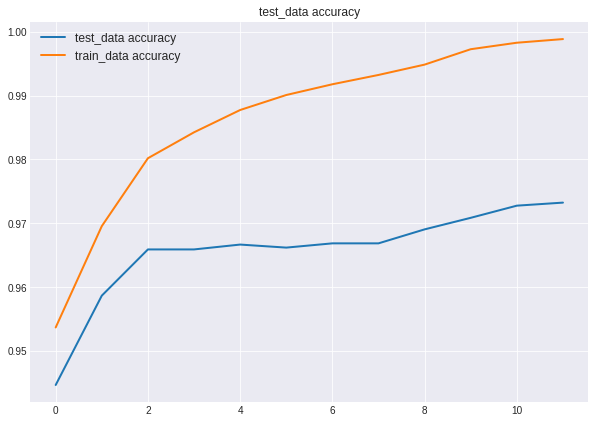

In [ ]:
plt.style.use("seaborn-darkgrid")
plt.figure(figsize=(10, 7))

plt.title("test_data accuracy")
plt.plot(range(epochs), accuracy["test"], linewidth=2, label="test_data accuracy")
plt.plot(range(epochs), accuracy["train"], linewidth=2, label="train_data accuracy")
plt.legend(fontsize=12)
plt.show()

In [ ]:
test_img = X_test[:, 1234].reshape(-1, 1)
test_label = y_test[1234]

_, _, _, prediction = forward_pass(test_img, w_1, b_1, w_2, b_2)
prediction = prediction.argmax(axis=0)

label: 9
prediction: [9]


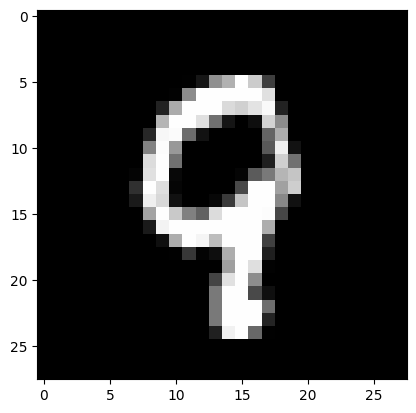

In [ ]:
print(f"label: {test_label}")
print(f"prediction: {prediction}")

plt.style.use("default")
plt.gray()

current_image = test_img.reshape((28, 28))
plt.imshow(current_image)

plt.show()